### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

### Reading the dataset

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Exploration

In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640.0,NaN,NaN,NaN,-119.569704,2.003532,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640.0,NaN,NaN,NaN,35.631861,2.135952,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.0,NaN,NaN,NaN,28.639486,12.585558,1.0,18.0,29.0,37.0,52.0
total_rooms,20640.0,NaN,NaN,NaN,2635.763081,2181.615252,2.0,1447.75,2127.0,3148.0,39320.0
total_bedrooms,20433.0,NaN,NaN,NaN,537.870553,421.38507,1.0,296.0,435.0,647.0,6445.0
population,20640.0,NaN,NaN,NaN,1425.476744,1132.462122,3.0,787.0,1166.0,1725.0,35682.0
households,20640.0,NaN,NaN,NaN,499.53968,382.329753,1.0,280.0,409.0,605.0,6082.0
median_income,20640.0,NaN,NaN,NaN,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,NaN,NaN,NaN,206855.816909,115395.615874,14999.0,119600.0,179700.0,264725.0,500001.0
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking null values and duplicates

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.duplicated().value_counts()

False    20640
Name: count, dtype: int64

### Median house value histogram

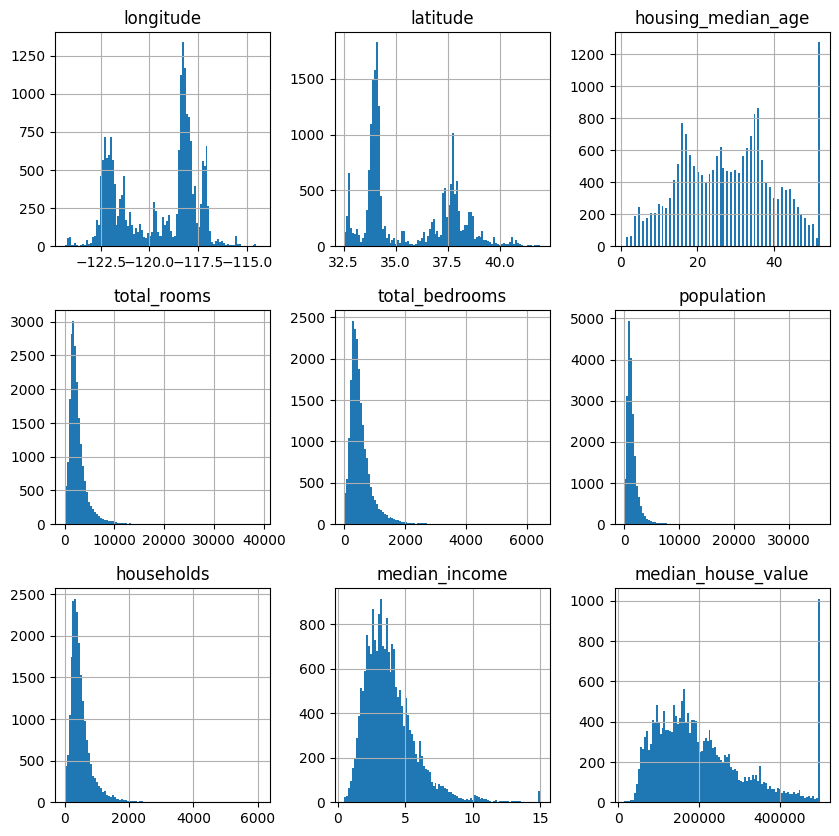

In [10]:
df.hist(figsize=(10,10), bins=100);

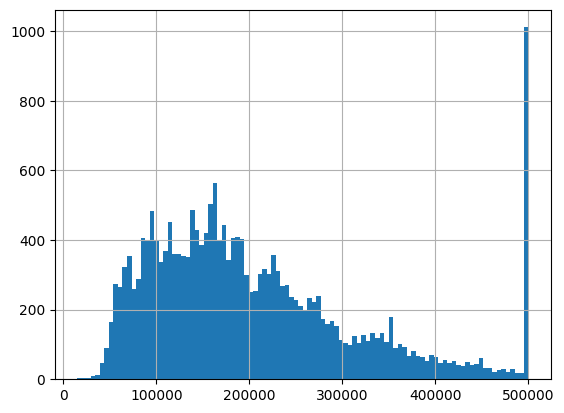

In [11]:
df.median_house_value.hist(bins=100);

In [12]:
df_new = df[df.ocean_proximity.isin(['<1H OCEAN','INLAND'])]

In [13]:
df_new = df_new.loc[:, ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
              'population', 'households', 'median_income', 'median_house_value']]

In [14]:
df_new.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


## Question 1

In [15]:
df_new.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [16]:
# total_bedrooms

### Question 2

In [17]:
np.median(df_new.population)

1195.0

### Prepare and split the dataset

In [18]:
n = len(df_new)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

print(f'Total number of columns: {n}, validation and test {n_val, n_test}, for the train data {n_train}')

Total number of columns: 15687, validation and test (3137, 3137), for the train data 9413


In [19]:
idx = np.arange(n)
np.random.seed(42)

np.random.shuffle(idx)
df_shuffle = df_new.iloc[idx]

In [20]:
df_shuffle.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


### Apply log1 to the median_house_value before splitting the dataset

In [21]:
df_shuffle.median_house_value = np.log1p(df_shuffle.median_house_value)

<Axes: >

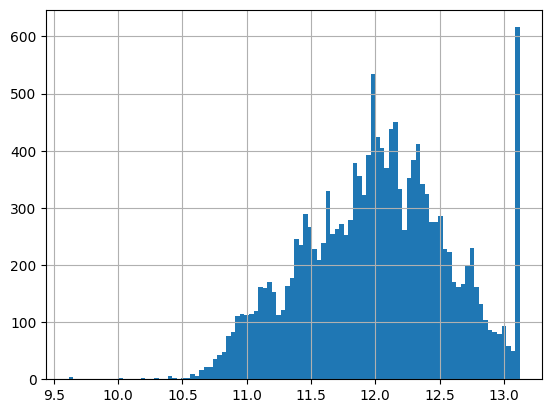

In [22]:
df_shuffle.median_house_value.hist(bins=100)

### Split dataset in train, val and test

In [23]:
df_train = df_shuffle.iloc[: n_train]
df_val = df_shuffle.iloc[n_train: n_train + n_val]
df_test = df_shuffle.iloc[n_train + n_val: ]

In [24]:
df_train.shape, df_val.shape, df_val.shape

((9413, 9), (3137, 9), (3137, 9))

#### Reset index

In [25]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,33.90,-117.44,23.0,4487.0,754.0,2609.0,778.0,4.2788,11.909693
1,38.03,-121.65,28.0,3144.0,694.0,1095.0,482.0,3.4402,12.167337
2,37.25,-121.85,20.0,3773.0,624.0,1965.0,607.0,5.4939,12.393386
3,32.78,-116.97,35.0,1113.0,236.0,681.0,246.0,2.9784,11.823354
4,37.97,-121.32,43.0,2453.0,490.0,1093.0,438.0,2.9107,11.394153
...,...,...,...,...,...,...,...,...,...
3132,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923,13.122367
3133,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504,12.500237
3134,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875,12.364789
3135,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250,11.331416


### Dividing data in train, test and validation

In [26]:
X_train = df_train.iloc[: , :-1]
y_train = df_train.iloc[:, -1]

X_test = df_test.iloc[: , :-1]
y_test = df_test.iloc[:, -1]

X_val = df_val.iloc[: , :-1]
y_val = df_val.iloc[:, -1]

In [27]:
print(f'The shape of the X_training dataset is: {X_train.shape}')
print(f'The shape of the X_test dataset is: {X_test.shape}')
print(f'The shape of the X_val dataset is: {X_val.shape}')

The shape of the X_training dataset is: (9413, 8)
The shape of the X_test dataset is: (3137, 8)
The shape of the X_val dataset is: (3137, 8)


In [28]:
print(f'The shape of the y_training dataset is: {y_train.shape}')
print(f'The shape of the y_test dataset is: {y_test.shape}')
print(f'The shape of the y_val dataset is: {y_val.shape}')

The shape of the y_training dataset is: (9413,)
The shape of the y_test dataset is: (3137,)
The shape of the y_val dataset is: (3137,)


### Question 3

#### Linear Regresion function

In [29]:
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

#### Function to fill NaN values with 0 or any othe value if provided 

In [30]:
def fill_null(df, fillna_value=0):
    return df.fillna(fillna_value)

#### Function for RMSE values:

In [31]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

#### Preparing Train data and running Linear Regression with the mean of total bedrooms column

In [38]:
# Trainin Linear Regression with the mean Train data in total bedrooms column
X_mean_train = fill_null(X_train, X_train.total_bedrooms.mean())

w_0_mean_train, w_1_mean_train = linear_regression(X_mean_train, y_train)

In [40]:
# Filling null values on the validation dataset
X_mean_val = fill_null(X_val, X_val.total_bedrooms.mean())

y_mean_pred_val = w_0_mean_train + X_mean_val.dot(w_1_mean_train)

In [81]:
y_mean_pred_val

9235     11.714623
11104    12.474280
7428     11.841273
19928    11.792294
15534    12.053137
           ...    
20033    11.418994
19766    11.183598
6970     12.392941
6790     12.055414
5991     12.062247
Length: 3137, dtype: float64

#### Evaluation with mean value

In [45]:
round(rmse(y_val, y_mean_pred_val), 2)

0.34

#### Preparing Train data and running Linear Regression with the zero of total bedrooms column

In [42]:
# Trainin Linear Regression with the mean Train data in total bedrooms column
X_zero_train = fill_null(X_train)

w_0_zero_train, w_1_zero_train = linear_regression(X_zero_train, y_train)

In [43]:
# Filling null values on the validation dataset
X_zero_val = fill_null(X_val)

y_zero_pred_val = w_0_zero_train + X_zero_val.dot(w_1_zero_train)

#### Evaluate with zero value

In [44]:
round(rmse(y_val, y_zero_pred_val), 2)

0.34

- **Both are equal**

### Question 4

### Linear Regression with Regularization

In [47]:
def linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [48]:
# Regularization list
reg_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [50]:
for r in reg_list:
    w_0, w_1 = linear_regression_reg(X_zero_train, y_train, r)

    y_pred = w_0 + X_zero_val.dot(w_1)

    print(f'The result for reg value {r} is -> {round(rmse(y_val, y_pred), 2)}')

The result for reg value 0 is -> 0.34
The result for reg value 1e-06 is -> 0.34
The result for reg value 0.0001 is -> 0.34
The result for reg value 0.001 is -> 0.34
The result for reg value 0.01 is -> 0.34
The result for reg value 0.1 is -> 0.34
The result for reg value 1 is -> 0.34
The result for reg value 5 is -> 0.35
The result for reg value 10 is -> 0.35


In [51]:
# Answer - Could be from 0 to 1 with this code

### Question 5

In [52]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [54]:
df_std = df_new.copy()

In [57]:
df_std.median_house_value = np.log1p(df_new.median_house_value)

In [59]:
rmse_result_list = []

In [60]:
for s in seed_values:
    # Adding the seed
    temp_id = np.arange(n)
    np.random.seed(s)

    # Shuffle the dataset
    np.random.shuffle(temp_id)
    df_shuffle = df_std.iloc[temp_id]

    # Making the train, test, and val dataset
    df_train = df_shuffle.iloc[: n_train]
    df_val = df_shuffle.iloc[n_train: n_train + n_val]
    df_test = df_shuffle.iloc[n_train + n_val: ]

    X_train = df_train.iloc[: , :-1]
    y_train = df_train.iloc[:, -1]  
    X_test = df_test.iloc[: , :-1]
    y_test = df_test.iloc[:, -1] 
    X_val = df_val.iloc[: , :-1]
    y_val = df_val.iloc[:, -1]

    # Filling null values
    X_train_prep = fill_null(X_train)
    X_val_prep = fill_null(X_val)

    w_0, w = linear_regression(X_train_prep, y_train)
    y_pred_val = w_0 + X_val_prep.dot(w)

    rmse_result = round(rmse(y_val, y_pred_val), 2)

    print(f'The result for seed value {s} is -> {rmse_result}')

    rmse_result_list.append(rmse_result)

The result for seed value 0 is -> 0.34
The result for seed value 1 is -> 0.34
The result for seed value 2 is -> 0.34
The result for seed value 3 is -> 0.33
The result for seed value 4 is -> 0.34
The result for seed value 5 is -> 0.34
The result for seed value 6 is -> 0.34
The result for seed value 7 is -> 0.35
The result for seed value 8 is -> 0.35
The result for seed value 9 is -> 0.33


In [63]:
round(np.std(rmse_result_list), 3)

0.006

### Question 6

In [66]:
# Adding new seed
id_final = np.arange(n)
np.random.seed(9)

# Shuffle the dataset
np.random.shuffle(id_final)
df_shuffle = df_std.iloc[id_final]

In [67]:
# Making the train, test, and val dataset
df_train = df_shuffle.iloc[: n_train]
df_val = df_shuffle.iloc[n_train: n_train + n_val]
df_test = df_shuffle.iloc[n_train + n_val: ]

In [69]:
df_train_val = pd.concat([df_train, df_val])

In [70]:
df_train_val.shape

(12550, 9)

In [71]:
X_train = df_train_val.iloc[: , :-1]
y_train = df_train_val.iloc[:, -1]  
X_test = df_test.iloc[: , :-1]
y_test = df_test.iloc[:, -1] 

In [74]:
X_train_prep = fill_null(X_train)
X_test_prep = fill_null(X_test)

In [75]:
w_0, w = linear_regression_reg(X_train_prep, y_train, 0.001)

In [76]:
y_pred = w_0 + X_test_prep.dot(w)

In [79]:
round(rmse(y_test, y_pred), 2)

0.33